In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import netCDF4 as nc

data = nc.Dataset('bi_2007.nc')
print(data)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    geospatial_bounds_crs: EPSG:4326
    Conventions: CF-1.6
    geospatial_bounds: POLYGON((-124.7666666333333 49.400000000000000, -124.7666666333333 25.066666666666666, -67.058333300000015 25.066666666666666, -67.058333300000015 49.400000000000000, -124.7666666333333 49.400000000000000))
    geospatial_lat_min: 25.066666666666666
    geospatial_lat_max: 49.40000000000000
    geospatial_lon_min: -124.7666666333333
    geospatial_lon_max: -67.058333300000015
    geospatial_lon_resolution: 0.041666666666666
    geospatial_lat_resolution: 0.041666666666666
    geospatial_lat_units: decimal_degrees north
    geospatial_lon_units: decimal_degrees east
    coordinate_system: EPSG:4326
    author: John Abatzoglou - University of Idaho, jabatzoglou@uidaho.edu
    date: 04 July 2019
    note1: The projection information for this file is: GCS WGS 1984.
    note2: Citation: Abatzoglou, J.T., 2013, Development of gridded

In [19]:
# Print dimensions
print(data.dimensions.keys())

# Print variables
print(data.variables.keys())

dict_keys(['lon', 'lat', 'day', 'crs'])
dict_keys(['lon', 'lat', 'day', 'crs', 'burning_index_g'])


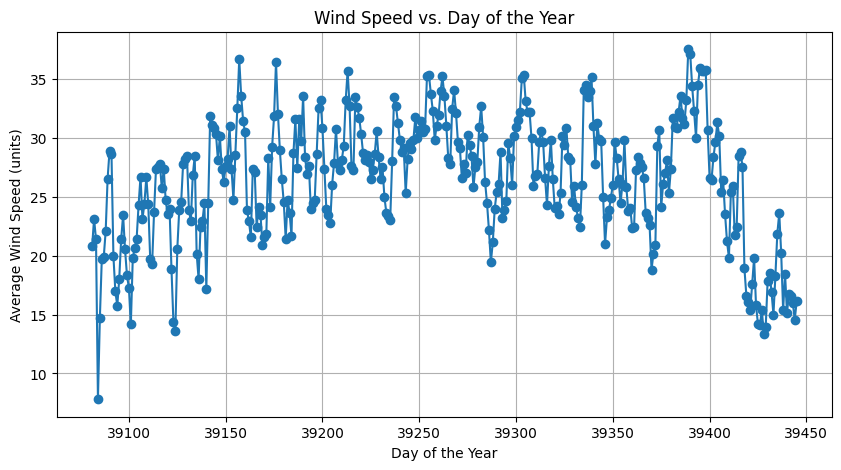

In [20]:
# Access variables
wind_speed = data.variables['burning_index_g'][:]  # Adjust the variable name accordingly
date = data.variables['day'][:]  # Adjust if the time variable has a different name

# Assuming lat and lon dimensions exist
lat = data.variables['lat'][:]  # Adjust based on your dataset
lon = data.variables['lon'][:]  # Adjust based on your dataset

# Calculate mean wind speed over latitude and longitude
mean_wind_speed = wind_speed.mean(axis=(1, 2))  # Assuming wind_speed has lat and lon as the last two dimensions

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(date, mean_wind_speed, marker='o')
plt.title('Wind Speed vs. Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Average Wind Speed (units)')
plt.grid()
plt.show()